In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = os.path.join(os.getcwd(), 'training')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(os.listdir(train_dir))

['cats', 'dogs']


In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(os.listdir(train_cats_dir))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [20]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [22]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 22s 1s/step - loss: 0.8948 - accuracy: 0.5059 - val_loss: 0.6897 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 24s 2s/step - loss: 0.6826 - accuracy: 0.5150 - val_loss: 0.6687 - val_accuracy: 0.5056
Epoch 3/15
15/15 [==============================] - 24s 2s/step - loss: 0.6538 - accuracy: 0.5513 - val_loss: 0.6512 - val_accuracy: 0.6808
Epoch 4/15
15/15 [==============================] - 24s 2s/step - loss: 0.6073 - accuracy: 0.6592 - val_loss: 0.6113 - val_accuracy: 0.7054
Epoch 5/15
15/15 [==============================] - 23s 2s/step - loss: 0.5687 - accuracy: 0.7035 - val_loss: 0.5854 - val_accuracy: 0.6518
Epoch 6/15
15/15 [==============================] - 23s 2s/step - loss: 0.5098 - accuracy: 0.7206 - val_loss: 0.5747 - val_accuracy: 0.6920
Epoch 7/15
15/15 [==============================] - 24s 2s/step - los

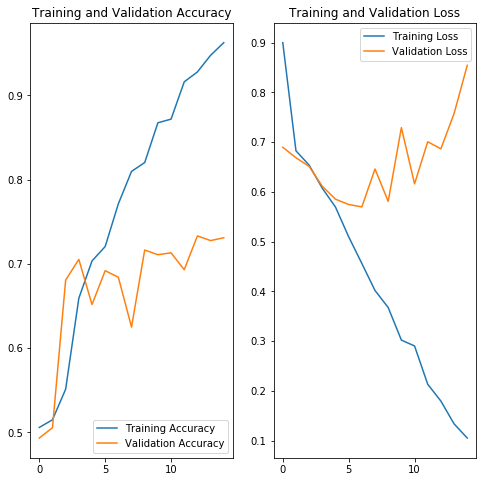

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
from os import listdir
from os.path import isfile,join
import numpy as np

predict_dir_path='test/'
test_files = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(test_files)
IMG_WIDTH=150 
IMG_HEIGHT=150

['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg', 'cat.5.jpg', 'cat.6.jpg', 'dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.11.jpg', 'dog.12.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg', 'dog.5.jpg', 'dog.7.jpg', 'dog.8.jpg', 'dog.9.jpg', 'download (1).jpg']


In [44]:
from keras.preprocessing import image

dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(IMG_WIDTH, IMG_HEIGHT))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1

cat.0.jpg: dog
cat.1.jpg: cat
cat.2.jpg: cat
cat.3.jpg: cat
cat.4.jpg: cat
cat.5.jpg: cat
cat.6.jpg: dog
dog.0.jpg: dog
dog.1.jpg: dog
dog.10.jpg: dog
dog.11.jpg: dog
dog.12.jpg: dog
dog.2.jpg: dog
dog.3.jpg: dog
dog.4.jpg: dog
dog.5.jpg: dog
dog.7.jpg: dog
dog.8.jpg: dog
dog.9.jpg: dog
download (1).jpg: dog
